# Exploratory Data Analysis - Mental Health Dataset
This notebook contains an exploratory data analysis of the mental health dataset to understand patterns and relationships in the data.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_palette('husl')

# Display all columns
pd.set_option('display.max_columns', None)

colors = ['#67001f', '#b2182b', '#d6604d', '#f4a582', '#fddbc7', '#f7f7f7', '#d1e5f0', '#92c5de', '#4393c3', '#2166ac', '#053061']

## Data Loading and Initial Data Exploration

In [112]:
# Load the datasets
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

# Display basic information about the training dataset
print('Training Dataset Shape:', train_df.shape)
print('Training Dataset Info:')
train_df.info()

print('First few rows of the training dataset:')
train_df.head()

Training Dataset Shape: (140700, 20)
Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [113]:
print(f"There are {train_df.shape[1]} columns and {train_df.shape[0]} rows in the train dataset.")


There are 20 columns and 140700 rows in the train dataset.


### Data Types in the Dataset

In [114]:
print("Column names and data type of each column:")
train_df.dtypes

Column names and data type of each column:


id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

## Statistical Summary of Numerical Features

In [115]:
# Get statistical summary of numerical columns
print('Statistical Summary of Numerical Features:')
train_df.describe()

Statistical Summary of Numerical Features:


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


## Missing Value Analysis

In [116]:
# Check for missing values
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print('Missing Value Analysis:')
missing_df[missing_df['Missing Values'] > 0]

Missing Value Analysis:


,Missing Values,Percentage
Profession,36630,26.034115
Academic Pressure,112803,80.172708
Work Pressure,27918,19.842217
CGPA,112802,80.171997
Study Satisfaction,112803,80.172708
Job Satisfaction,27910,19.836532
Dietary Habits,4,0.002843
Degree,2,0.001421
Financial Stress,4,0.002843


<Axes: title={'center': 'Visualizing Missing Values'}>

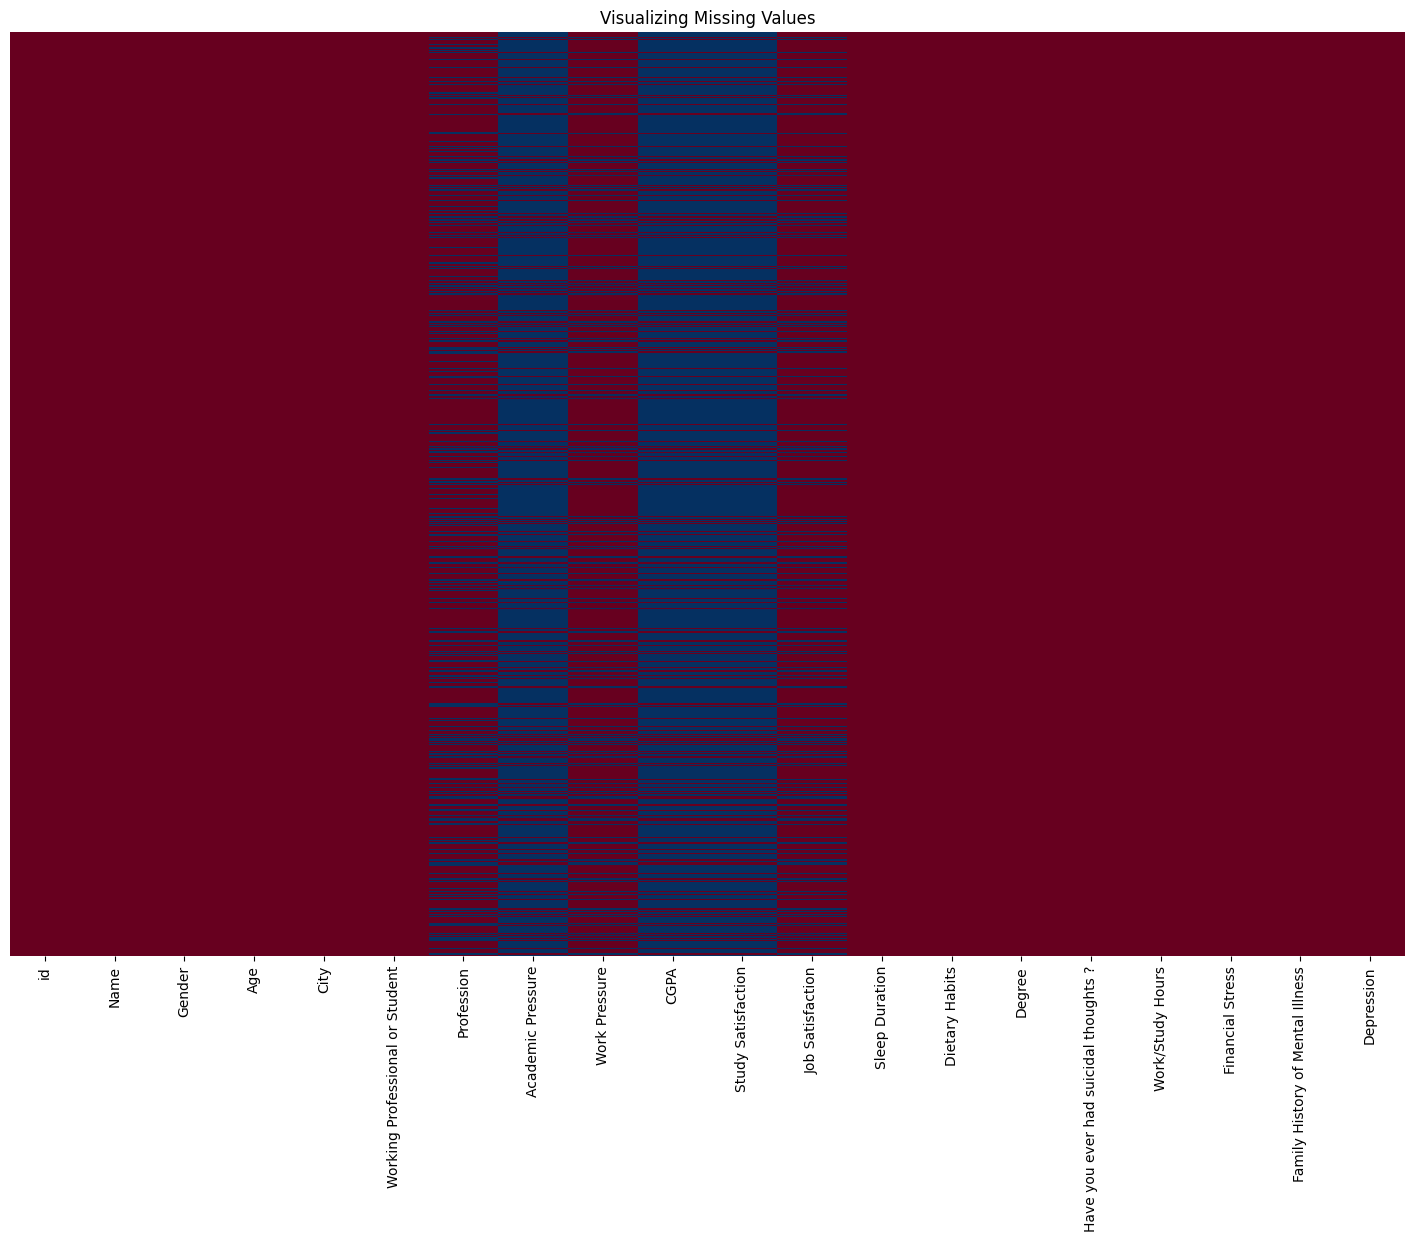

In [117]:
plt.figure(figsize=(18,12))
plt.title("Visualizing Missing Values")
sns.heatmap(train_df.isnull(), cbar=False, cmap=sns.color_palette(colors), yticklabels=False)

## Data Separation for Categorical and Numerical

In [118]:
categorical_columns = train_df.select_dtypes(include=['object']).columns
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: Index(['Name', 'Gender', 'City', 'Working Professional or Student',
       'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')
Numerical columns: Index(['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')


### Removing the Target Column and id

In [119]:
target_column = 'Depression'
tain_df = train_df.drop(['id'], axis=1)
test_df = test_df.drop(['id'], axis=1)

## Categorical Unique Values:

In [120]:
print("Unique Values in Categorical Columns:")
categorical_columns = train_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\n{col}:")
    print(train_df[col].value_counts())

Unique Values in Categorical Columns:

Name:
Name
Rohan       3178
Aarav       2336
Rupak       2176
Aaradhya    2045
Anvi        2035
            ... 
Anhil          1
Rieta          1
Zahra          1
Jathesh        1
Aarun          1
Name: count, Length: 422, dtype: int64

Gender:
Gender
Male      77464
Female    63236
Name: count, dtype: int64

City:
City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

Working Professional or Student:
Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

Profession:
Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
BBA                   1
City Manager          1
FamilyVira

### Categorical Variable Plots

In [121]:
for column in categorical_columns:
    num_unique = train_df[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")
    

'Name' has 422 unique categories.
'Gender' has 2 unique categories.
'City' has 98 unique categories.
'Working Professional or Student' has 2 unique categories.
'Profession' has 64 unique categories.
'Sleep Duration' has 36 unique categories.
'Dietary Habits' has 23 unique categories.
'Degree' has 115 unique categories.
'Have you ever had suicidal thoughts ?' has 2 unique categories.
'Family History of Mental Illness' has 2 unique categories.


In [122]:
# Create a DataFrame with categorical columns and their unique value counts
cat_unique_counts = pd.DataFrame({
    'Column Name': categorical_columns,
    'Unique Categories': [train_df[column].nunique() for column in categorical_columns]
})

# Display the table with styling
display(cat_unique_counts.style.set_properties(**{
    'text-align': 'left',
    'padding': '8px',
    'border': '1px solid black'
}).set_table_styles([
    {'selector': 'th',
     'props': [('background-color', '#f2f2f2'),
               ('text-align', 'left'),
               ('padding', '8px'),
               ('border', '1px solid black')]}
]))

,Column Name,Unique Categories
0,Name,422
1,Gender,2
2,City,98
3,Working Professional or Student,2
4,Profession,64
5,Sleep Duration,36
6,Dietary Habits,23
7,Degree,115
8,Have you ever had suicidal thoughts ?,2
9,Family History of Mental Illness,2


## Numerical Data

In [123]:
# Create a DataFrame with skewness values
skewness_df = pd.DataFrame({
    'Column Name': numerical_columns,
    'Skewness': [train_df[col].skew() for col in numerical_columns]
})

# Display the table with styling
display(skewness_df.style.set_properties(**{
    'text-align': 'left',
    'padding': '8px',
    'border': '1px solid black'
}).set_table_styles([
    {'selector': 'th',
     'props': [('background-color', '#f2f2f2'),
               ('text-align', 'left'),
               ('padding', '8px'),
               ('border', '1px solid black')]}
]))

,Column Name,Skewness
0,id,0.000000
1,Age,-0.217977
2,Academic Pressure,-0.133977
3,Work Pressure,0.018515
4,CGPA,-0.073636
5,Study Satisfaction,0.011764
6,Job Satisfaction,0.054361
7,Work/Study Hours,-0.128169
8,Financial Stress,0.035603
9,Depression,1.650852


## Feature Distribution Analysis

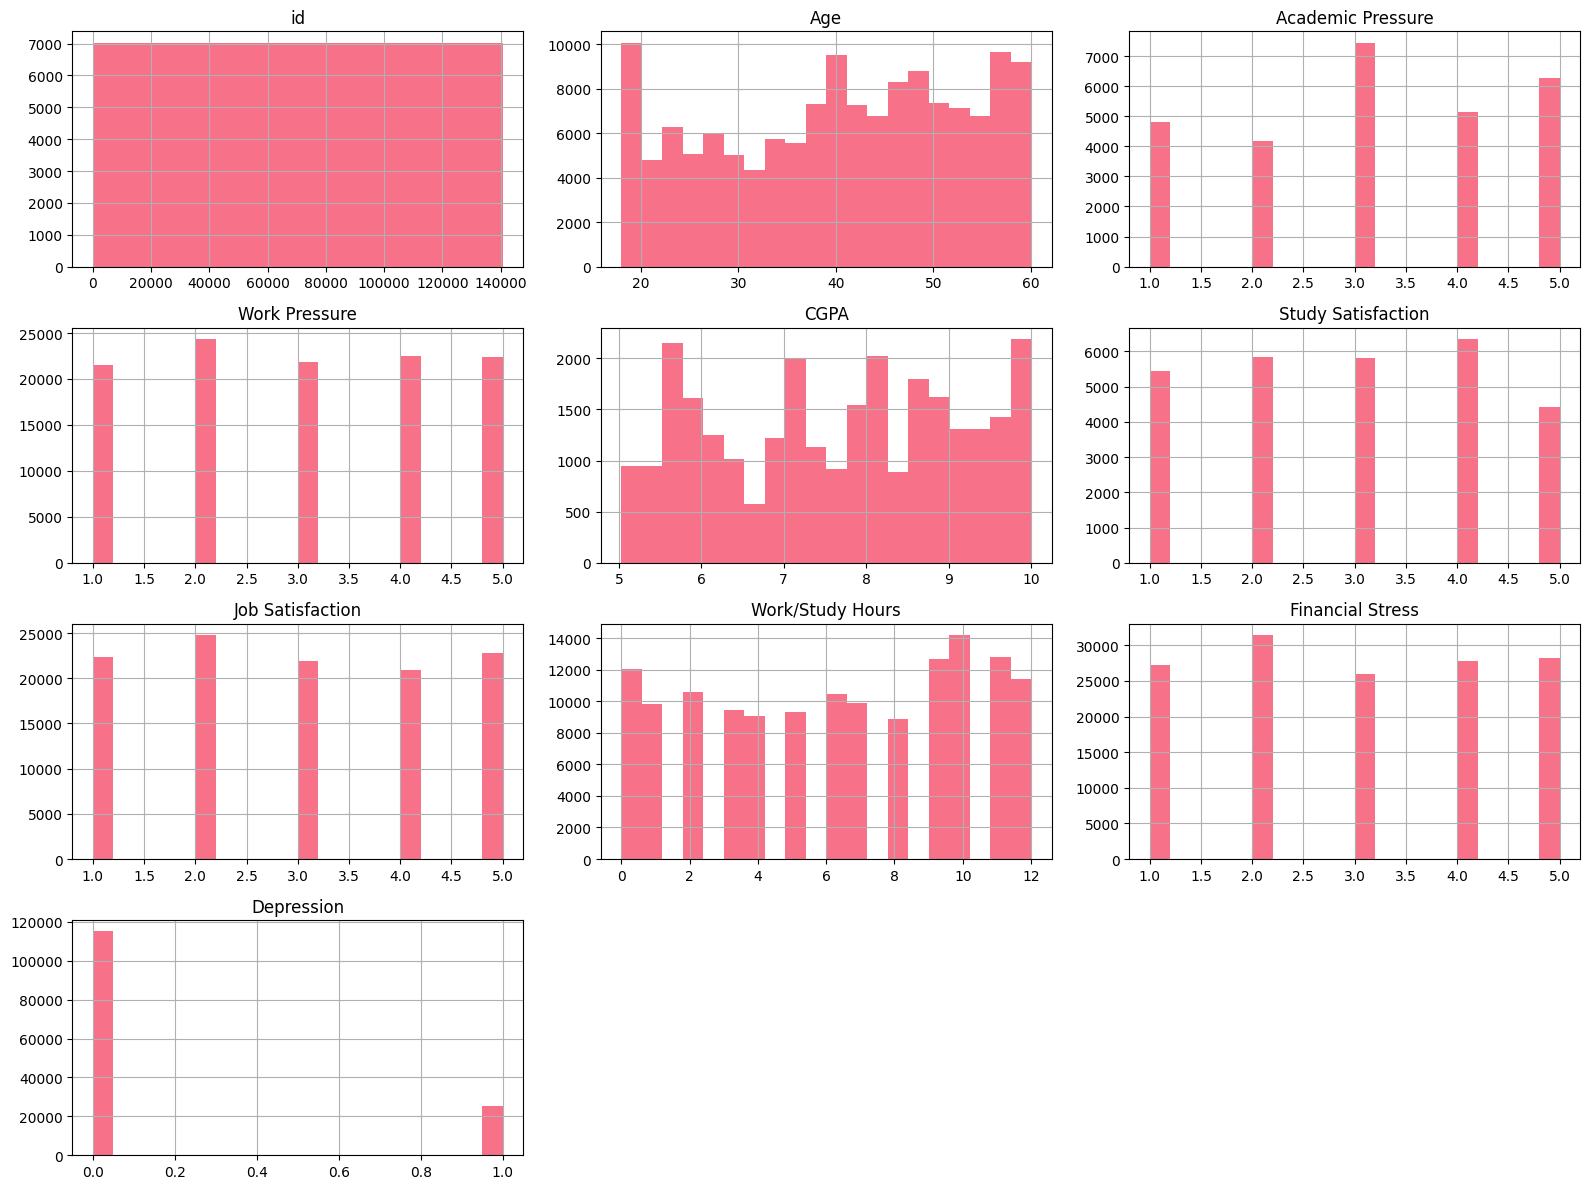

In [124]:
# Function to plot distribution for numerical features
def plot_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Plot distributions for numerical columns
numerical_columns_list = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

 # Remove 'id' from the list if it exists
if 'id' in numerical_columns:
    numerical_columns_list.remove('id')

# for column in numerical_columns:
#     plot_distribution(train_df, column)

# Plot histograms for numerical variables
    train_df[numerical_columns].hist(figsize=(16, 12), bins=20)
    plt.tight_layout()
    plt.show()

## Categorical Feature Analysis

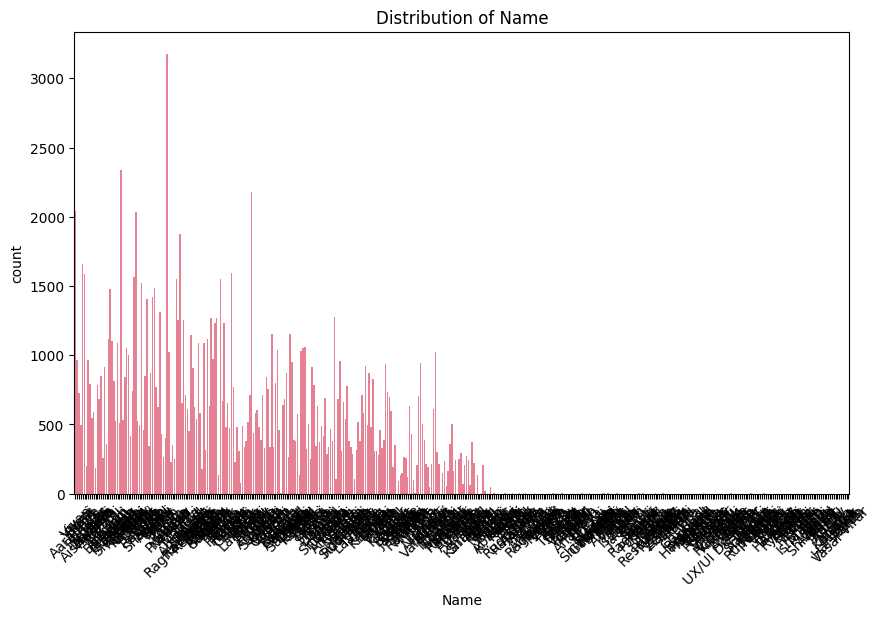

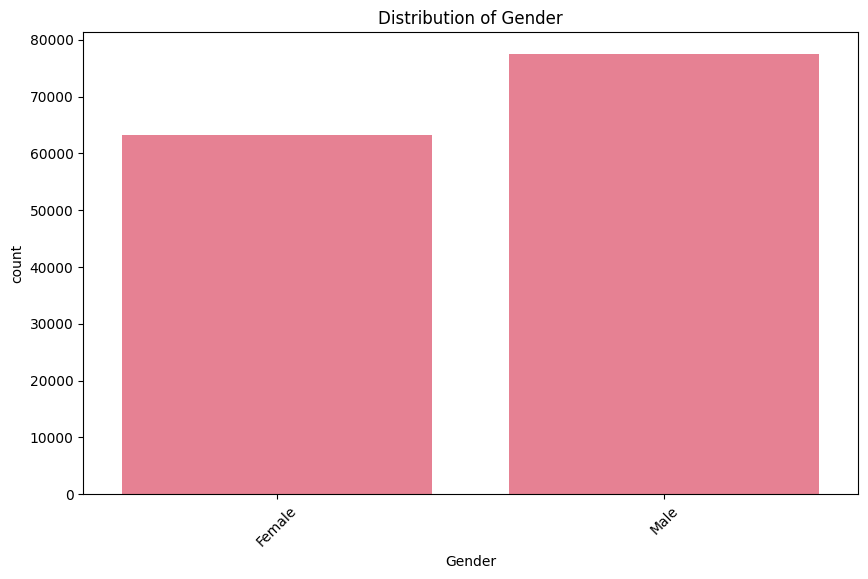

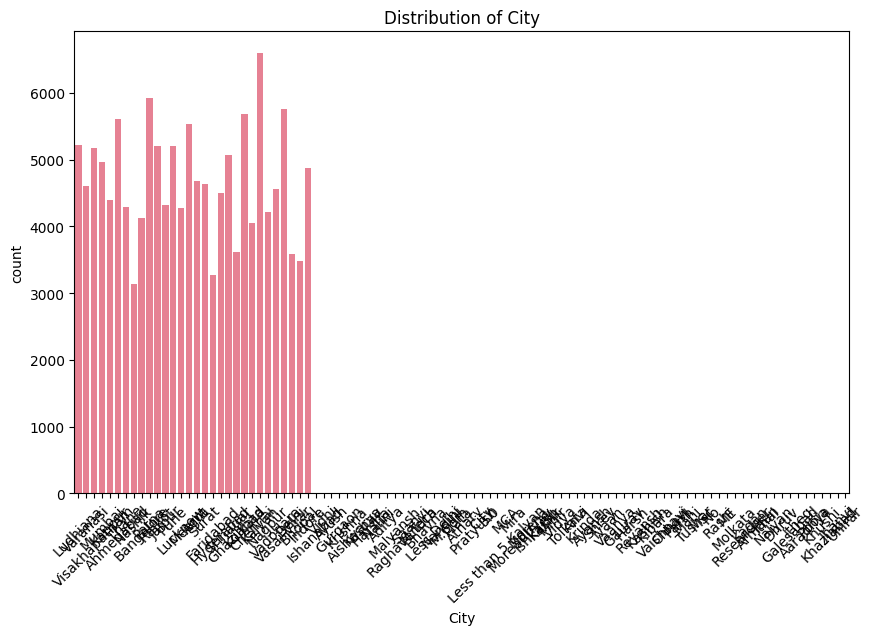

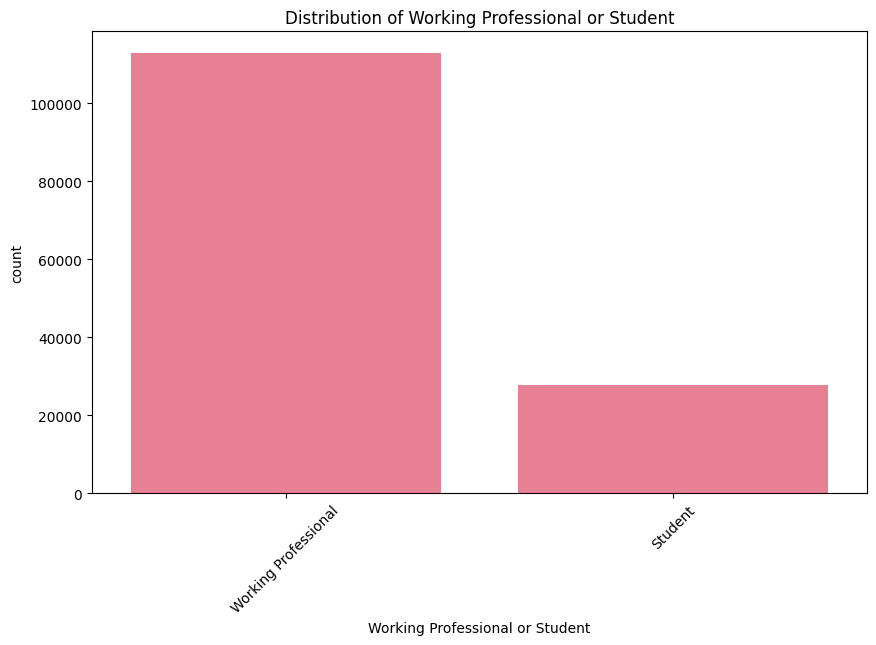

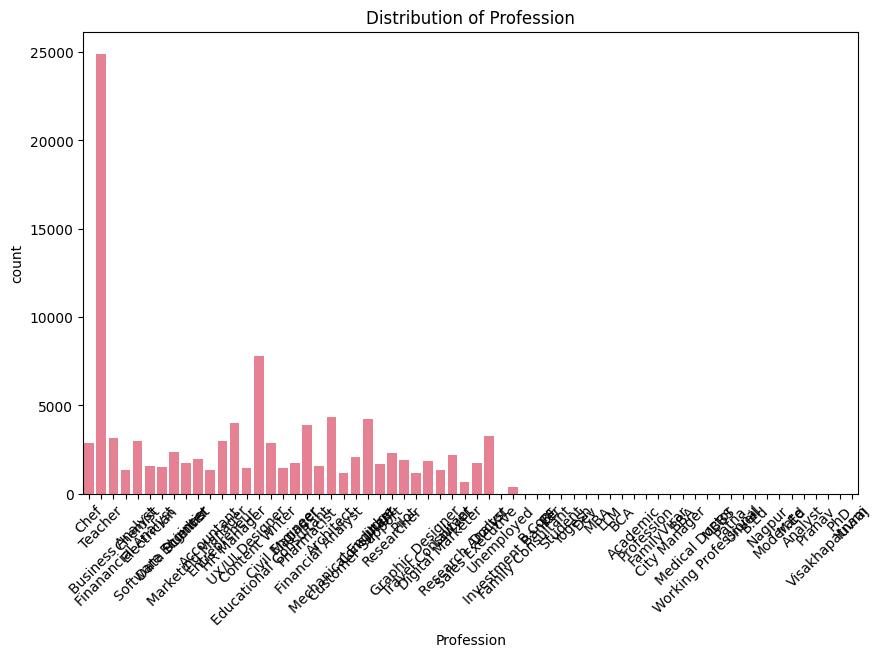

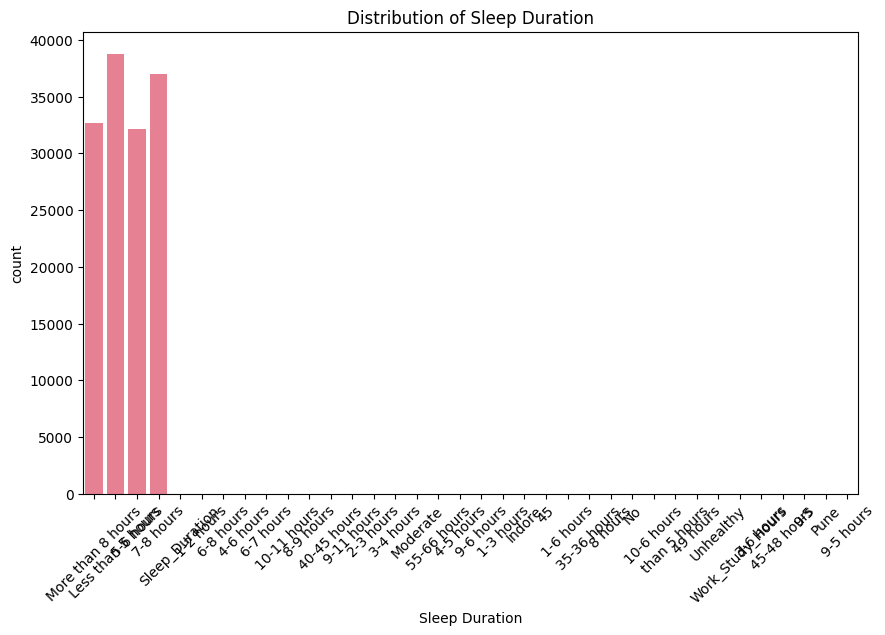

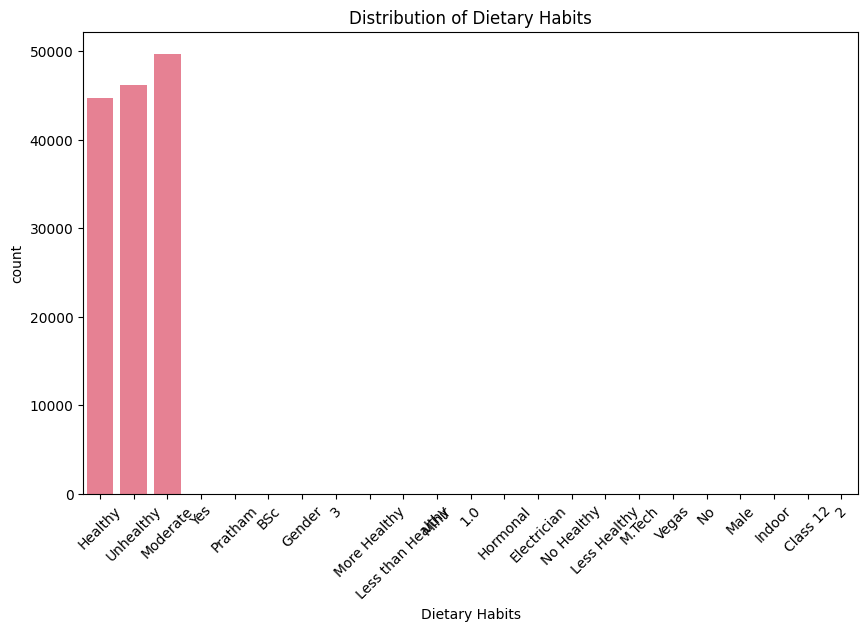

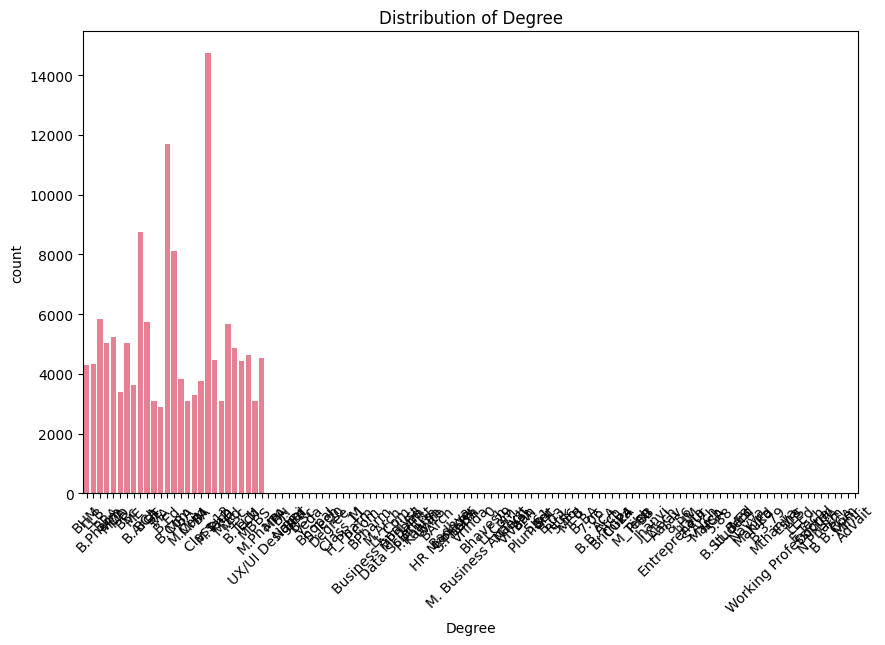

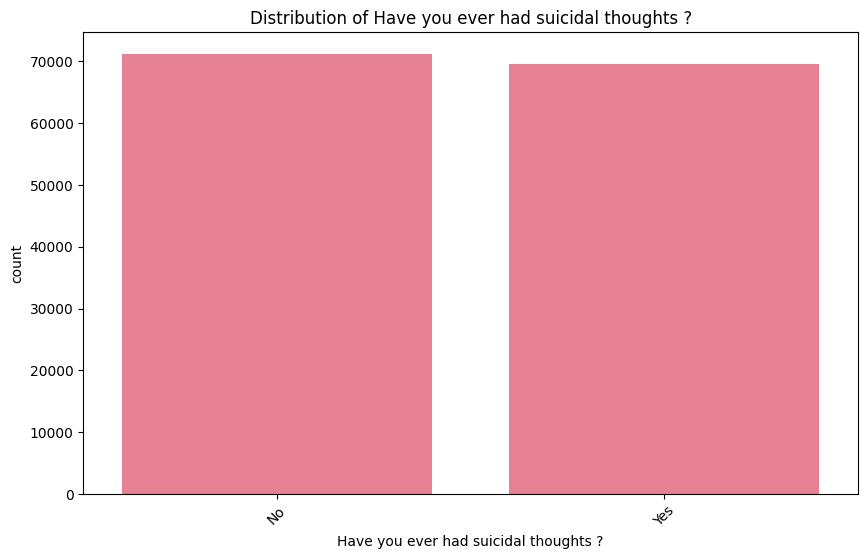

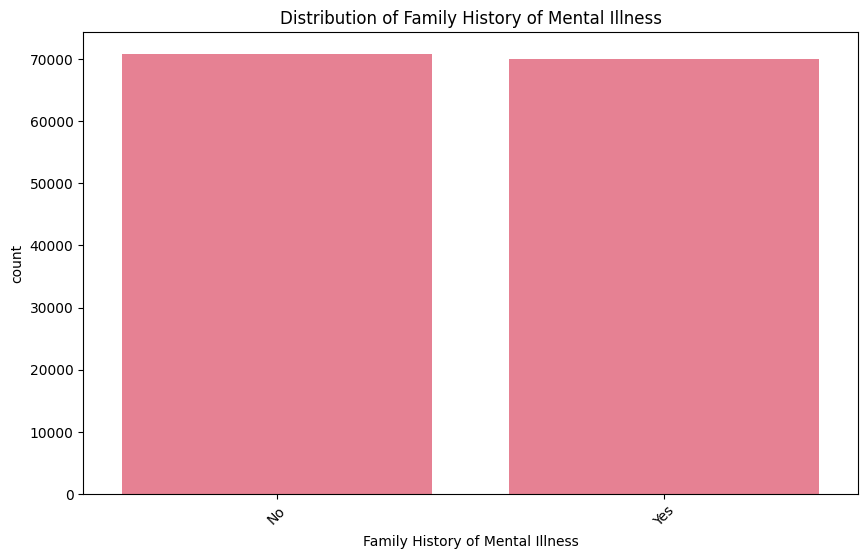

In [125]:
# Function to plot categorical feature distributions
def plot_categorical(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Plot distributions for categorical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plot_categorical(train_df, column)

## Correlation Analysis

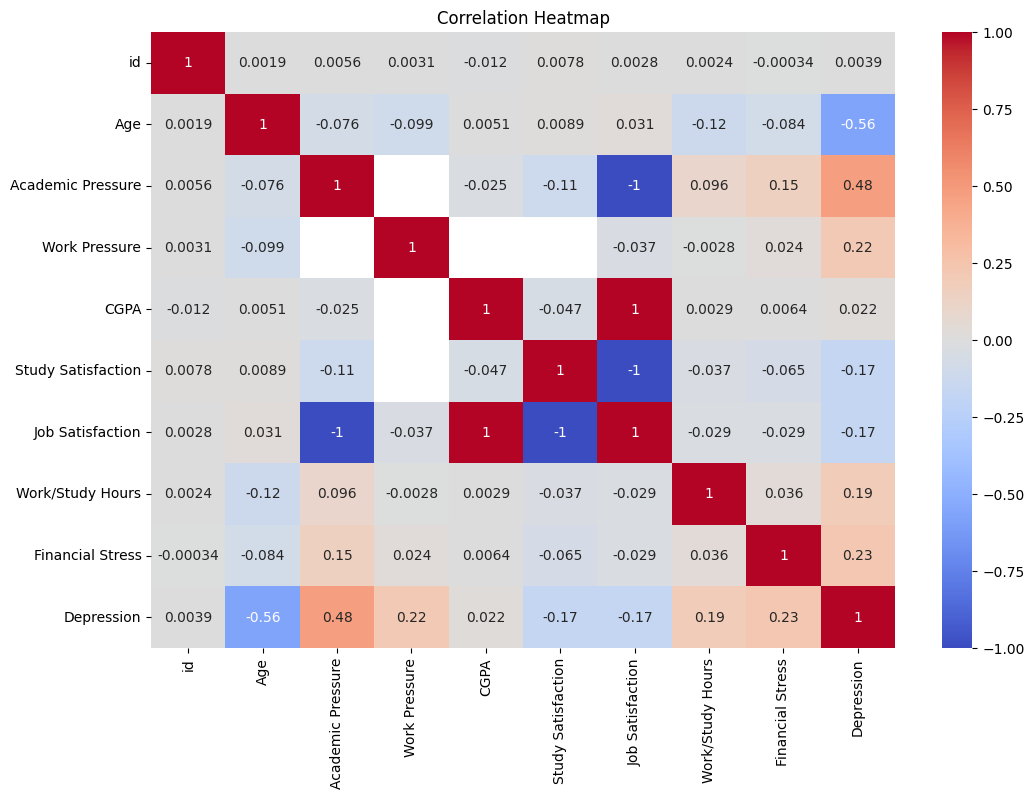

In [126]:
# Calculate correlation matrix for numerical features
correlation_matrix = train_df.select_dtypes(include=['int64', 'float64']).corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Target value distribution

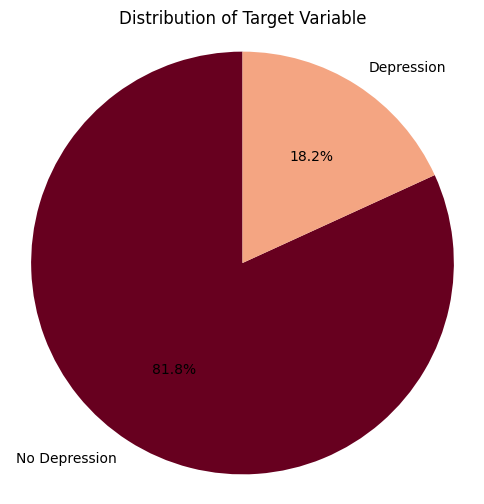

In [127]:
class_counts = train_df[target_column].value_counts().sort_index()
labels = ["No Depression", "Depression"]
plt.figure(figsize=(6, 6))
plt.pie(class_counts, colors=[colors[0], colors[3]], labels=labels,
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Academic Pressure'),
  Text(2, 0, 'Work Pressure'),
  Text(3, 0, 'CGPA'),
  Text(4, 0, 'Study Satisfaction'),
  Text(5, 0, 'Job Satisfaction'),
  Text(6, 0, 'Work/Study Hours'),
  Text(7, 0, 'Financial Stress'),
  Text(8, 0, 'Depression')])

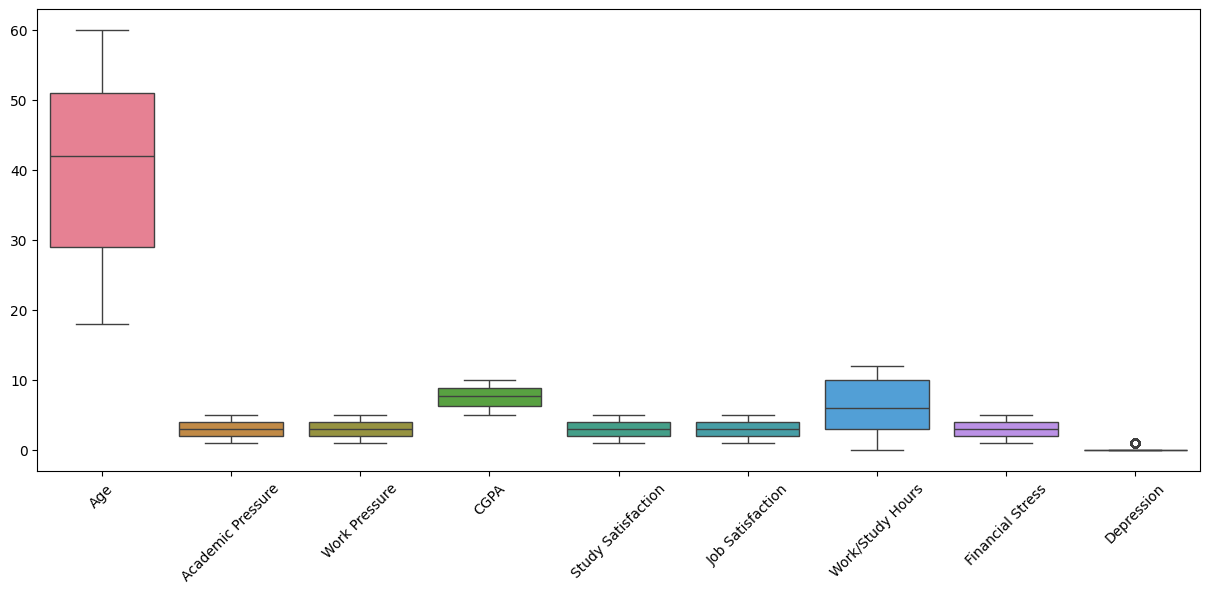

In [128]:
plt.figure(figsize=(15, 6))
# remove the id column
numerical_columns = train_df.drop('id', axis=1).select_dtypes(include='number').columns
sns.boxplot(data=train_df[numerical_columns])
plt.xticks(rotation=45)

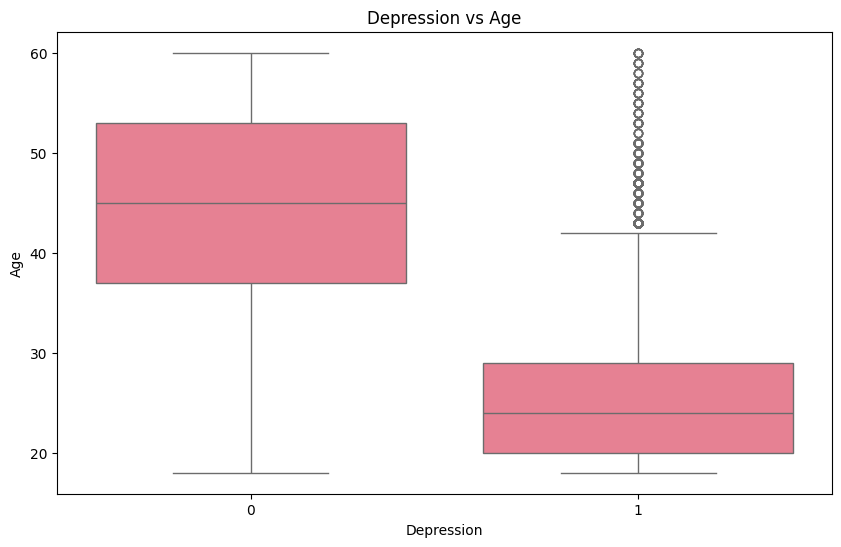

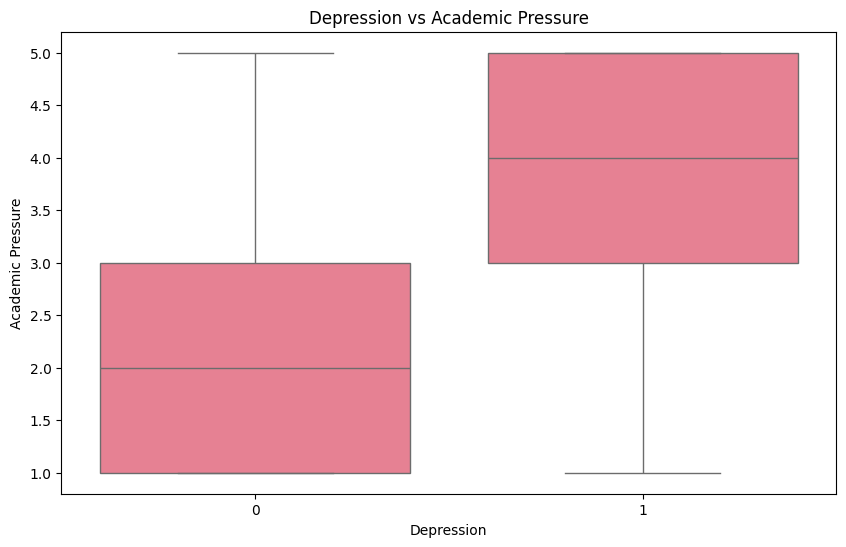

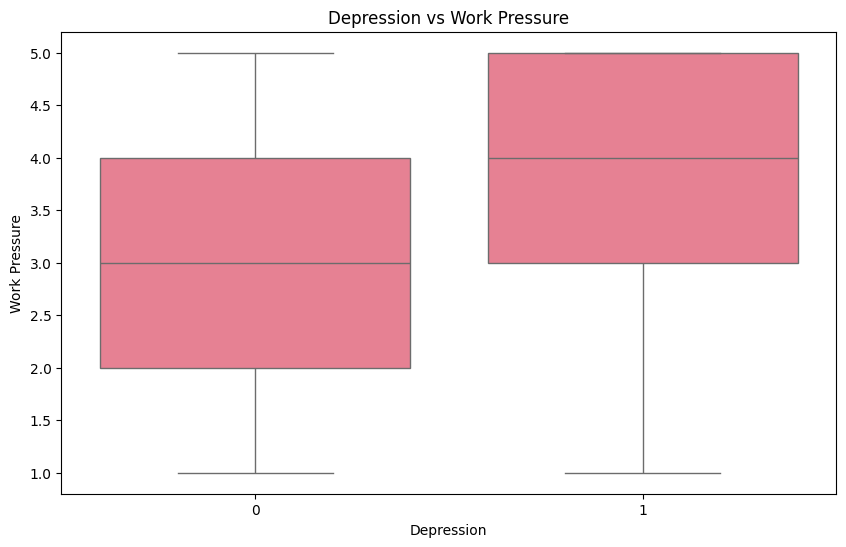

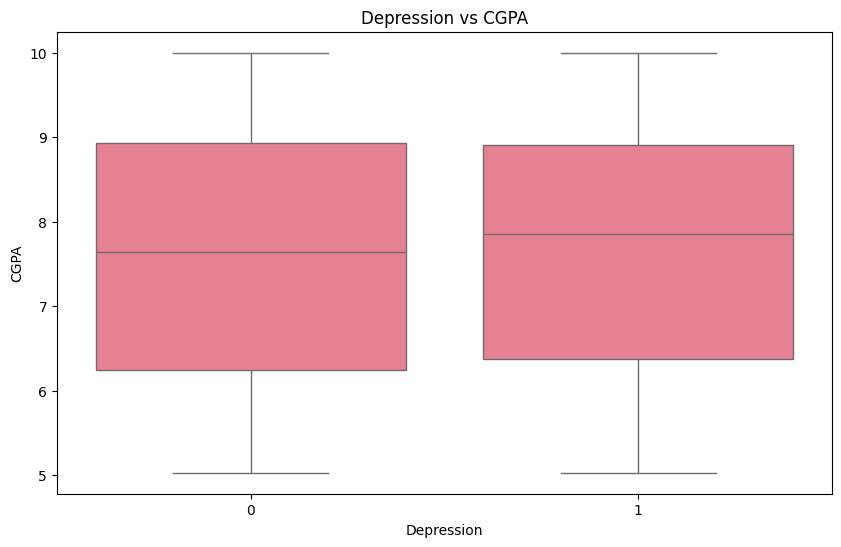

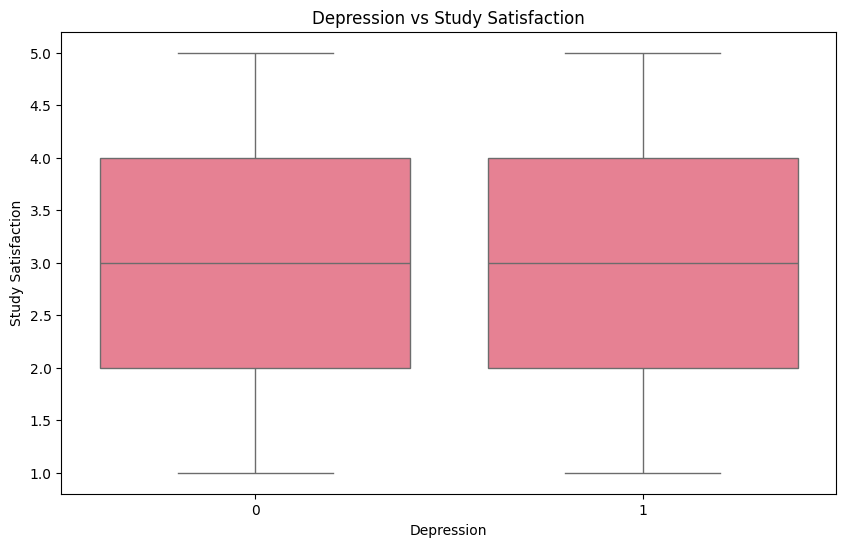

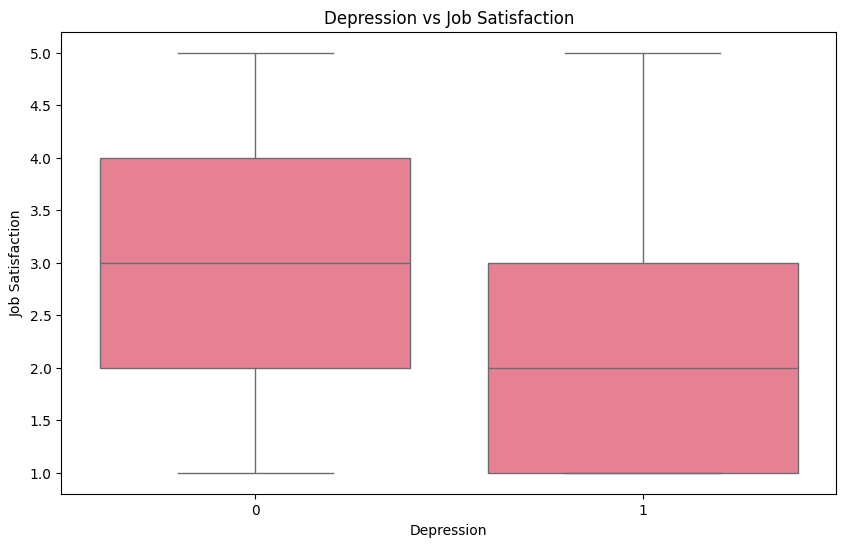

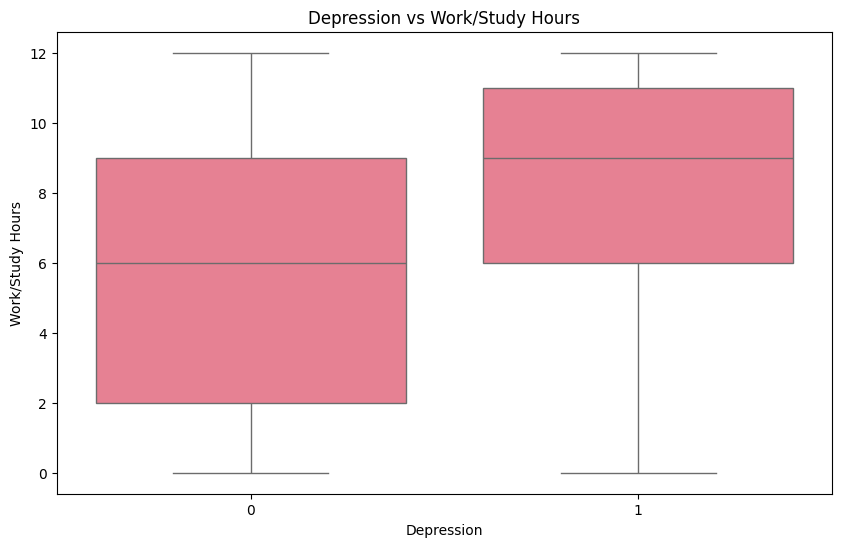

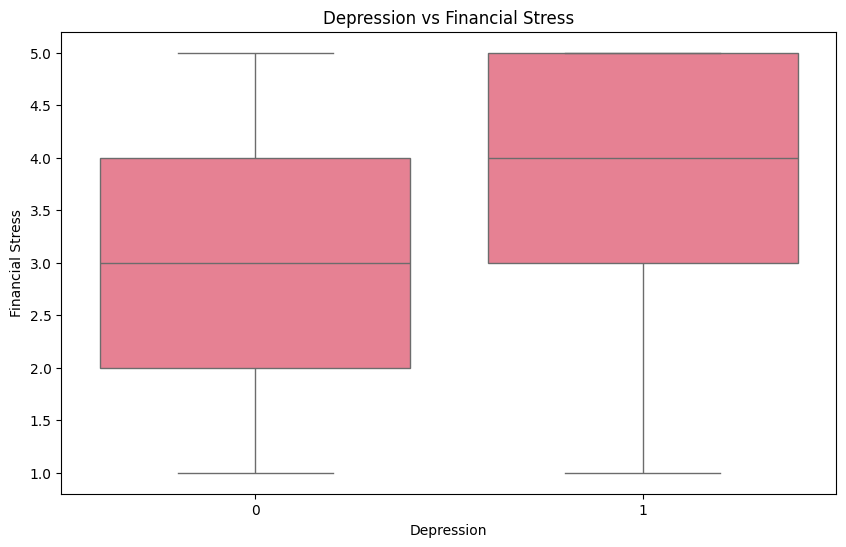

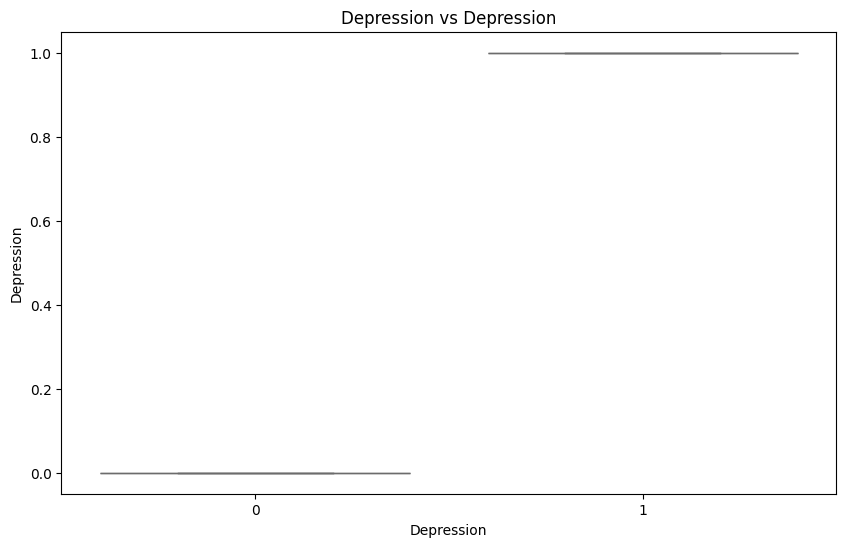

In [129]:
for num_col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, x='Depression', y=num_col)
    plt.title(f'Depression vs {num_col}')

/var/folders/2k/n1kmf9ns0dx49077c14tclgr0000gn/T/ipykernel_14559/349546756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=train_df['Profession'].value_counts().head(10).index, x=train_df['Profession'].value_counts().head(10).values, palette='viridis')


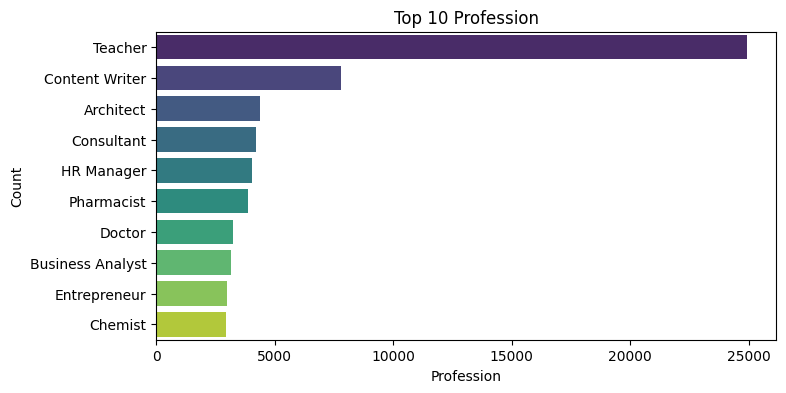

In [130]:
plt.figure(figsize=(8, 4))
sns.barplot(y=train_df['Profession'].value_counts().head(10).index, x=train_df['Profession'].value_counts().head(10).values, palette='viridis') 
plt.title("Top 10 Profession")
plt.xlabel('Profession')
plt.ylabel('Count')
plt.show()

## Imputation of Missing Values

In [131]:
from sklearn.impute import SimpleImputer
# Impute missing numerical values using median (robust to outliers)
# num_imputer = SimpleImputer(strategy="median")
# train_df[numerical_columns] = num_imputer.fit_transform(train_df[numerical_columns])

# # Impute missing categorical values using the most frequent value (mode)
# cat_imputer = SimpleImputer(strategy="most_frequent")
# train_df[categorical_columns] = cat_imputer.fit_transform(train_df[categorical_columns])

In [132]:
# Create an imputer for numerical features
imputer = SimpleImputer(strategy='median')

# Apply imputation to relevant columns
columns_to_impute = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress']
train_df[columns_to_impute] = imputer.fit_transform(train_df[columns_to_impute])

In [133]:
# Check for missing values in the dataset
missing_values = train_df.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])


Missing values in each column:
 Profession        36630
Dietary Habits        4
Degree                2
dtype: int64


In [134]:
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,3.0,5.0,7.77,3.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,7.77,3.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,3.0,8.97,2.0,3.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,7.77,3.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,7.77,3.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## Encoding Categorical Features using sklearn's OneHotEncoder

In [135]:
# # Encoding sk learn one hot encoder
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder


# # Create a column transformer that applies one-hot encoding to categorical features 
# # and passes through the numerical features unchanged.
# ct = ColumnTransformer(
#     transformers=[
#         ("cat", OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_columns)
#     ],
#     remainder="passthrough"
# )

# # Fit and transform the dataset
# df_encoded_array = ct.fit_transform(train_df)

# # Retrieve the new feature names:
# # The encoder creates names like "cat__<original_column>_<category>"
# encoded_cat_cols = ct.named_transformers_["cat"].get_feature_names_out(categorical_columns)
# # The remainder columns (numerical) are kept as is. Their order will be as they appear in the original DataFrame.
# remainder_cols = [col for col in train_df.columns if col not in categorical_columns]
# all_columns = list(encoded_cat_cols) + remainder_cols

# # Convert the array back to a DataFrame
# df_encoded = pd.DataFrame(df_encoded_array, columns=all_columns)

# print("\nData After Imputation and One-Hot Encoding:")
# print(df_encoded.head())

## Label Encoding

In [136]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Encode categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le


In [143]:
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,11,0,49.0,50,1,10,3.0,5.0,7.77,3.0,2.0,29,7,33,0,1.0,2.0,0,0
1,1,407,1,26.0,93,1,55,3.0,4.0,7.77,3.0,3.0,27,20,63,1,7.0,3.0,0,1
2,2,417,1,33.0,97,0,64,5.0,3.0,8.97,2.0,3.0,15,7,21,1,3.0,1.0,0,1
3,3,417,1,22.0,64,1,55,3.0,5.0,7.77,3.0,1.0,27,15,28,1,10.0,1.0,1,1
4,4,286,0,30.0,37,1,9,3.0,1.0,7.77,3.0,1.0,15,20,28,1,9.0,4.0,1,0


## Train Test Split

In [153]:
target = "Depression"
if target not in train_df.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset.")

# Separate features and target variable
X = train_df.drop(columns=[target])
Y = train_df[target]

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [146]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

/Users/thisanet/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [147]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=10,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
model.fit(X_resampled, y_resampled)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=10,
                      random_state=42)

Feature Importance:
                                   Feature  Importance
3                                     Age    0.688439
17                       Financial Stress    0.076710
7                       Academic Pressure    0.060273
5         Working Professional or Student    0.056216
8                           Work Pressure    0.035930
15  Have you ever had suicidal thoughts ?    0.032851
11                       Job Satisfaction    0.018169
16                       Work/Study Hours    0.008610
13                         Dietary Habits    0.007355
12                         Sleep Duration    0.004668
10                     Study Satisfaction    0.002203
0                                      id    0.002103
1                                    Name    0.001767
9                                    CGPA    0.001368
4                                    City    0.001207
14                                 Degree    0.001025
6                              Profession    0.000778
2      

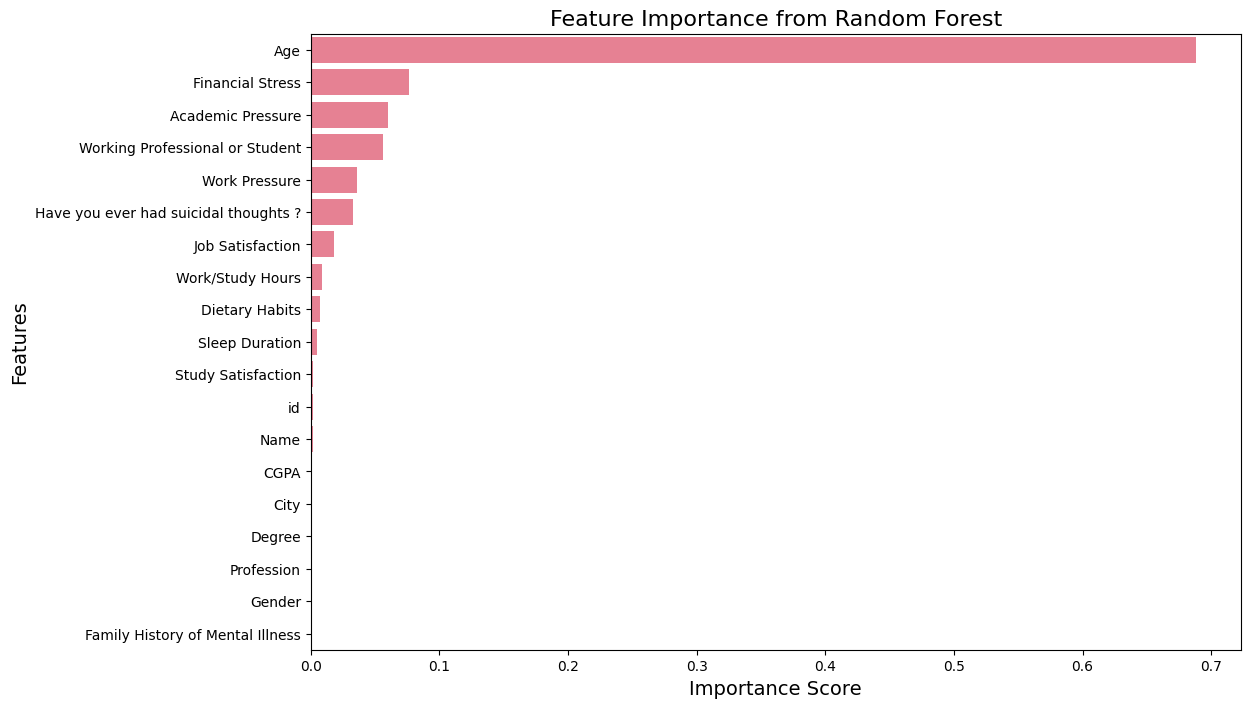

In [148]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

# Step 7: Visualize Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

### Feature Selection

In [149]:
importance_threshold = 0.01 

# Select features based on their importance
selected_features = feature_importance[feature_importance['Importance'] > importance_threshold]['Feature'].tolist()
print("Selected Features:\n", selected_features)

# Optionally, create a new DataFrame with only selected features
X_selected = X[selected_features]

Selected Features:
 ['Age', 'Financial Stress', 'Academic Pressure', 'Working Professional or Student', 'Work Pressure', 'Have you ever had suicidal thoughts ?', 'Job Satisfaction']


## Models Building and Evaluation

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42, stratify=Y)

In [158]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [159]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

print(models)

{'Logistic Regression': LogisticRegression(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'Gradient Boosting': GradientBoostingClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)}


In [160]:
def evaluate_model(y_true, y_pred):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Depression', 'Depression'], 
                yticklabels=['No Depression', 'Depression'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


Training Logistic Regression...
Logistic Regression Evaluation:
Accuracy: 0.93
Precision: 0.83
Recall: 0.79
F1 Score: 0.81
ROC AUC: 0.88


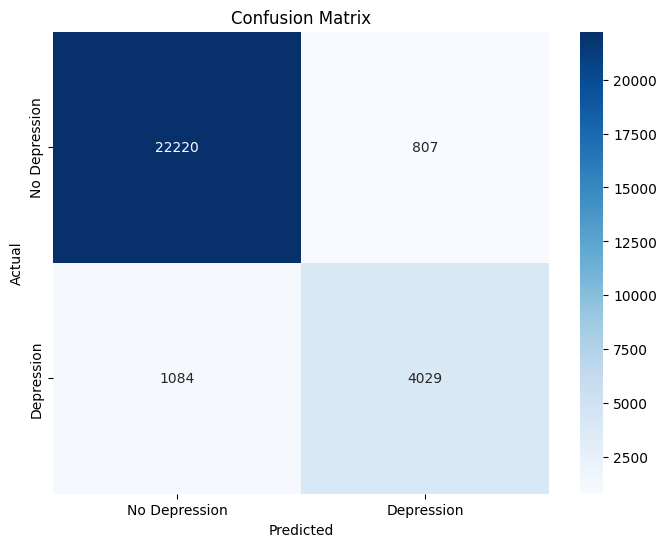


Training Random Forest...
Random Forest Evaluation:
Accuracy: 0.93
Precision: 0.81
Recall: 0.79
F1 Score: 0.80
ROC AUC: 0.87


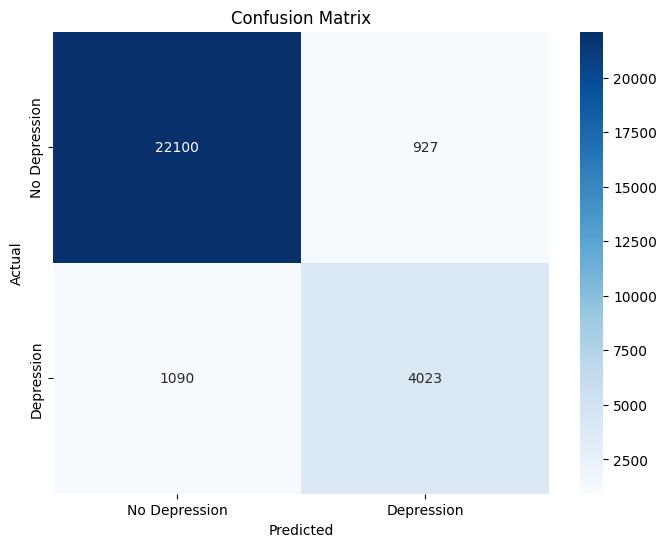


Training Gradient Boosting...
Gradient Boosting Evaluation:
Accuracy: 0.93
Precision: 0.83
Recall: 0.79
F1 Score: 0.81
ROC AUC: 0.88


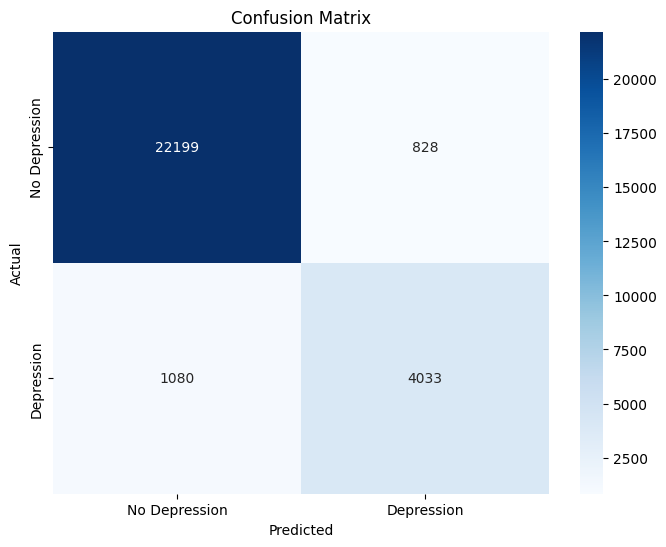


Training XGBoost...
XGBoost Evaluation:
Accuracy: 0.93
Precision: 0.83
Recall: 0.79
F1 Score: 0.81
ROC AUC: 0.88


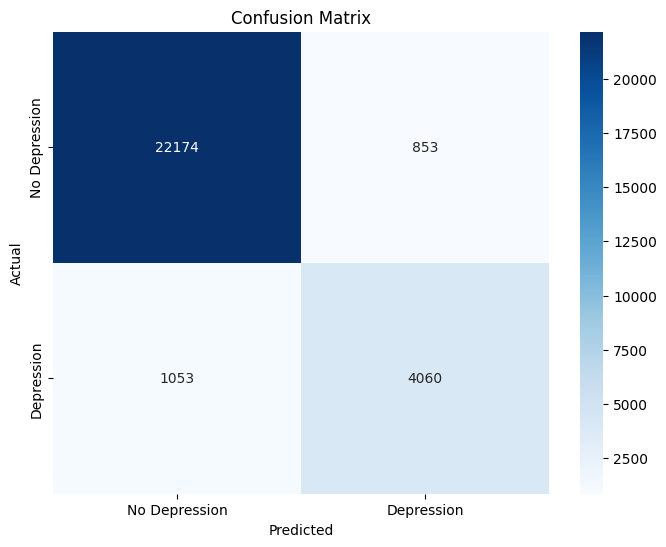

In [161]:
for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        print(f"{model_name} Evaluation:")
        evaluate_model(y_test, y_pred)

### Hyper Parameter Tuning


Tuning Logistic Regression...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best parameters for Logistic Regression:
{'C': 0.1, 'max_iter': 100}
Best cross-validation score: 0.9319

Logistic Regression Evaluation after tuning:
Accuracy: 0.93
Precision: 0.83
Recall: 0.79
F1 Score: 0.81
ROC AUC: 0.88


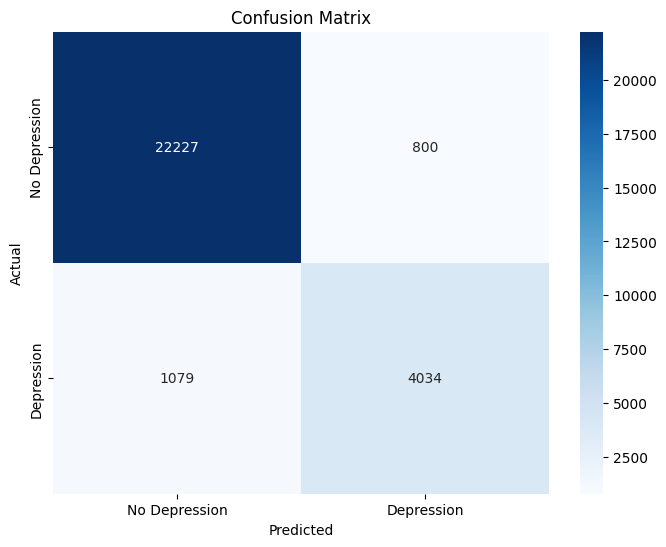


Tuning Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for Random Forest:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9325

Random Forest Evaluation after tuning:
Accuracy: 0.93
Precision: 0.83
Recall: 0.79
F1 Score: 0.81
ROC AUC: 0.88


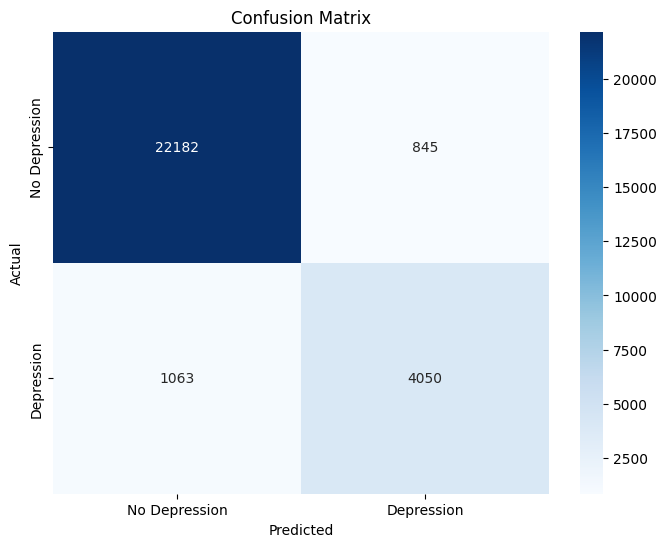


Tuning Gradient Boosting...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation score: 0.9331

Gradient Boosting Evaluation after tuning:
Accuracy: 0.93
Precision: 0.83
Recall: 0.79
F1 Score: 0.81
ROC AUC: 0.88


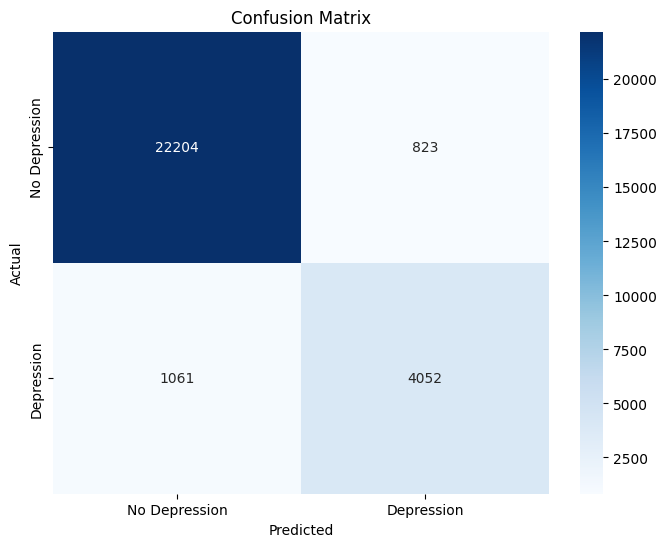


Tuning XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for XGBoost:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best cross-validation score: 0.9335

XGBoost Evaluation after tuning:
Accuracy: 0.93
Precision: 0.83
Recall: 0.80
F1 Score: 0.81
ROC AUC: 0.88


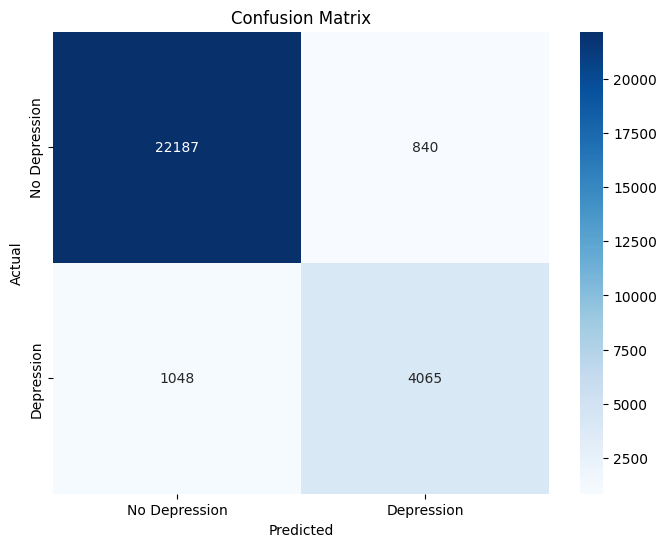

In [162]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'max_iter': [100, 200, 300]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1]
    }
}

# Perform grid search for each model
for model_name, model in models.items():
    print(f"\nTuning {model_name}...")
    
    # Get the parameter grid for the current model
    param_grid = param_grids.get(model_name, {})
    
    if param_grid:
        # Create and fit GridSearchCV
        grid_search = GridSearchCV(
            model,
            param_grid,
            cv=3,
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )
        grid_search.fit(X_train, y_train)
        
        # Print best parameters and score
        print(f"Best parameters for {model_name}:")
        print(grid_search.best_params_)
        print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
        
        # Update the model with the best estimator
        models[model_name] = grid_search.best_estimator_
        
        # Make predictions and evaluate
        y_pred = grid_search.predict(X_test)
        print(f"\n{model_name} Evaluation after tuning:")
        evaluate_model(y_test, y_pred)
    else:
        print(f"No parameter grid defined for {model_name}")